In [1]:
#Question 6

import pandas as pd

#pour un meilleur affichage des dataframes
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [2]:
#Question 7 on a déjà crée les titre de colonnes dans le ShroomLearning.py
csv_file = "data/champignons.csv"
champignonsDF = pd.read_csv(csv_file)

print(champignonsDF.shape)  # Affiche le nombre de lignes et de colonnes
print(champignonsDF.columns)  # Affiche les noms des colonnes





(1113, 4)
Index(['Edible', 'Color', 'Shape', 'Surface'], dtype='object')


In [3]:
#Question 8 donné de champignonsDF value_counts() avec aussi les données vide dropna=False
print(champignonsDF["Edible"].value_counts(dropna=False))

Edible
E      490
P      407
I      205
NaN     11
Name: count, dtype: int64


In [4]:
#question 9 et 10 remplace les valeurs de la colonne "Edible" par 0, 1, 2 et -1 pour les valeurs manquantes
champignonsDF["Edible"] = champignonsDF["Edible"].replace({"E": 0, "I": 1, "P": 2})
champignonsDF["Edible"] = champignonsDF["Edible"].fillna(-1).astype(int)
print(champignonsDF.shape)
print(champignonsDF.head())



(1113, 4)
   Edible         Color              Shape             Surface
0       2          Pale           Polypore              Smooth
1       0         White  Convex-Bellshaped      Smooth-Fibrous
2       0  White-Yellow             Convex              Smooth
3       0         White  Bellshaped-Convex              Smooth
4       0         Brown  Bellshaped-Convex  FlatScales-Fibrous


In [5]:
#question 10 

print(champignonsDF["Edible"].value_counts())


Edible
 0    490
 2    407
 1    205
-1     11
Name: count, dtype: int64


In [6]:
#question 12
shape_values = pd.unique(champignonsDF["Shape"].str.split("-").explode().dropna())

for value in shape_values:
    champignonsDF[value] = champignonsDF["Shape"].str.contains(value).fillna(False).astype(int)

print(champignonsDF.head())


   Edible         Color              Shape             Surface  Polypore  \
0       2          Pale           Polypore              Smooth         1   
1       0         White  Convex-Bellshaped      Smooth-Fibrous         0   
2       0  White-Yellow             Convex              Smooth         0   
3       0         White  Bellshaped-Convex              Smooth         0   
4       0         Brown  Bellshaped-Convex  FlatScales-Fibrous         0   

   Convex  Bellshaped  Flat  Depressed  CupFungi  CoralFungi  Knobbed  \
0       0           0     0          0         0           0        0   
1       1           1     0          0         0           0        0   
2       1           0     0          0         0           0        0   
3       1           1     0          0         0           0        0   
4       1           1     0          0         0           0        0   

   Conical  JellyFungi  Stinkhorns  Earthstars     Bolete  ToothFungi  \
0        0           0         

In [7]:
# Question 13
# Créer un DataFrame vide pour stocker les nouvelles colonnes
surface_df = pd.DataFrame()

# Pour chaque valeur possible dans la colonne "Surface", créer une nouvelle colonne dans le DataFrame
for surface in pd.unique(champignonsDF["Surface"].str.split("-").explode().dropna()):
    surface_df[surface] = champignonsDF["Surface"].str.contains(surface).fillna(False).astype(int)

# Concaténer le DataFrame original et le nouveau DataFrame contenant les nouvelles colonnes
champignonsDF = pd.concat([champignonsDF, surface_df], axis=1)



In [8]:

# On drop les colonnes "Shape" et "Surface" et la colonne vide
champignonsDF = champignonsDF.drop(columns=["Shape", "Surface"," "])

In [9]:


  # devrait afficher (1113, 35)

print(champignonsDF.shape)


(1113, 35)


In [10]:
#Question 14
rgb_colors = [
    ["White", 255, 255, 255],
    ["Gray", 128, 128, 128],
    ["Yellow", 255, 255, 0],
    ["Brown", 165, 42, 42],
    ["Red", 255, 0, 0],
    ["Pink", 255, 192, 203],
    ["Green", 0, 128, 0],
    ["Purple", 128, 0, 128],
    ["Orange", 255, 165, 0],
    ["Blue", 0, 0, 255],
    ["Pale", 219, 112, 147],
    ["Tan", 210, 180, 140],
    ["Dark", 0, 0, 0],
    ["Lilac", 200, 162, 200],
    ["Violet", 238, 130, 238],
]

In [11]:
#Question 15

rgbDF = pd.DataFrame(rgb_colors, columns=["Color", "R", "G", "B"])

print(rgbDF)


     Color    R    G    B
0    White  255  255  255
1     Gray  128  128  128
2   Yellow  255  255    0
3    Brown  165   42   42
4      Red  255    0    0
5     Pink  255  192  203
6    Green    0  128    0
7   Purple  128    0  128
8   Orange  255  165    0
9     Blue    0    0  255
10    Pale  219  112  147
11     Tan  210  180  140
12    Dark    0    0    0
13   Lilac  200  162  200
14  Violet  238  130  238


In [12]:
champignonsDF["Color"].str.split("-").str.len().max()

2

In [13]:
#QUestion 16 dataFrame colors
color_combined_unique = pd.unique(champignonsDF["Color"].explode().dropna())
colors = pd.DataFrame([color for color in color_combined_unique if '-' in color], columns=["Color Combined"])

In [14]:
print(colors)

   Color Combined
0    White-Yellow
1      White-Pale
2     White-Brown
3      Pink-Brown
4    Purple-Brown
5      Pale-Brown
6        Pale-Tan
7      Brown-Gray
8      Pale-White
9      Gray-Brown
10   Orange-Brown
11   Yellow-Brown
12   Brown-Yellow
13      Gray-Dark
14    Brown-White
15     Brown-Dark
16     Dark-Brown
17      Red-Brown
18     White-Gray
19      Gray-Pale
20       Pink-Red
21  Orange-Yellow
22  Yellow-Orange
23      White-Tan
24     Orange-Red
25     Green-Gray
26     Blue-Green
27     Brown-Pale
28   Yellow-Green
29  Purple-Violet
30   Lilac-Yellow
31       Tan-Pale
32  Violet-Purple
33      Pale-Gray
34    Pale-Purple
35     Gray-Lilac
36    Dark-Purple
37   Lilac-Purple
38    Pale-Yellow
39      Dark-Gray
40   Brown-Orange
41   Brown-Purple
42    Blue-Violet
43    Brown-Lilac
44    Purple-Gray
45    Green-Brown
46       Red-Dark
47    Lilac-Brown
48      Pink-Pale
49       Red-Pink
50    Pink-Yellow
51   White-Orange
52      White-Red
53      Red-White
54    Oran

In [15]:
#Question 17
colors[["Premiere Couleur", "Seconde Couleur"]] = colors["Color Combined"].str.split('-', expand=True)
print(colors)
# jointure entre colors et rgbDF en utilisant les colonnes "Premiere Couleur" et "Seconde Couleur"
merged_colors = pd.merge(colors, rgbDF, how='left', left_on='Premiere Couleur', right_on='Color')
print(merged_colors)
print("a")
merged_colors = pd.merge(merged_colors, rgbDF, how='left', left_on='Seconde Couleur', right_on='Color', suffixes=('_1', '_2'))
print(merged_colors)
print("b")
#calcule la moyenne des valeurs "R", "G", et "B" obtenues pour chaque ligne
merged_colors["R"] = merged_colors[["R_1", "R_2"]].mean(axis=1)
merged_colors["G"] = merged_colors[["G_1", "G_2"]].mean(axis=1)
merged_colors["B"] = merged_colors[["B_1", "B_2"]].mean(axis=1)

#sélectionne les colonnes nécessaires et renomme
colors = merged_colors[["Color Combined", "R", "G", "B"]].rename(columns={"Color Combined": "Color"})

print(colors)

   Color Combined Premiere Couleur Seconde Couleur
0    White-Yellow            White          Yellow
1      White-Pale            White            Pale
2     White-Brown            White           Brown
3      Pink-Brown             Pink           Brown
4    Purple-Brown           Purple           Brown
5      Pale-Brown             Pale           Brown
6        Pale-Tan             Pale             Tan
7      Brown-Gray            Brown            Gray
8      Pale-White             Pale           White
9      Gray-Brown             Gray           Brown
10   Orange-Brown           Orange           Brown
11   Yellow-Brown           Yellow           Brown
12   Brown-Yellow            Brown          Yellow
13      Gray-Dark             Gray            Dark
14    Brown-White            Brown           White
15     Brown-Dark            Brown            Dark
16     Dark-Brown             Dark           Brown
17      Red-Brown              Red           Brown
18     White-Gray            Wh

In [16]:
# Question 18
#Effectue une jointure entre champignonsDF et le DataFrame colors

# mélange les couleurs combinées dans la colonne "Color" avec les valeurs RGB correspondantes
champignonsDF = pd.merge(champignonsDF, colors, how='left', on='Color')
# cherche les lignes de color qui ont pas de tiret '-'
simple = champignonsDF['Color'].str.contains('-') == False
# Fusion avec le DataFrame rgbDF pour obtenir les valeurs RGB correspondantes

merged_data = champignonsDF[simple][['Color']].merge(rgbDF, how='left', on='Color')[['R', 'G', 'B']].values


champignonsDF.loc[simple, ['R', 'G', 'B']] = merged_data
# drop la colonnne color
champignonsDF.drop(columns=['Color'], inplace=True)

print(champignonsDF.columns)

#met les valeurs manquantes à -255
champignonsDF[['R', 'G', 'B']] = champignonsDF[['R', 'G', 'B']].fillna(-255)

# envoie le DataFrame dans le fichier CSV
champignonsDF.to_csv('data/champignons_processed.csv', index=False)




Index(['Edible', 'Polypore', 'Convex', 'Bellshaped', 'Flat', 'Depressed',
       'CupFungi', 'CoralFungi', 'Knobbed', 'Conical', 'JellyFungi',
       'Stinkhorns', 'Earthstars', 'Bolete', 'ToothFungi', 'Shellshaped',
       'Funnelshaped', 'Puffballs', 'Corticioid', 'Chanterelles',
       'Cylindrical', 'Truffles', 'FalseMorels', 'TrueMorels', 'Cauliflower',
       'Smooth', 'Fibrous', 'FlatScales', 'Patches', 'Silky', 'RaisedScales',
       'Hairy', 'Powder', 'Velvety', 'R', 'G', 'B'],
      dtype='object')


In [17]:
print(champignonsDF.head())


   Edible  Polypore  Convex  Bellshaped  Flat  Depressed  CupFungi  \
0       2         1       0           0     0          0         0   
1       0         0       1           1     0          0         0   
2       0         0       1           0     0          0         0   
3       0         0       1           1     0          0         0   
4       0         0       1           1     0          0         0   

   CoralFungi  Knobbed  Conical  JellyFungi  Stinkhorns  Earthstars  Bolete  \
0           0        0        0           0           0           0       0   
1           0        0        0           0           0           0       0   
2           0        0        0           0           0           0       0   
3           0        0        0           0           0           0       0   
4           0        0        0           0           0           0       0   

   ToothFungi  Shellshaped  Funnelshaped  Puffballs  Corticioid  Chanterelles  \
0           0          

In [18]:
# 3e jalon Question 19

from sklearn.model_selection import train_test_split


X = champignonsDF.drop("Edible", axis=1)
y = champignonsDF["Edible"]

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.25)


In [19]:
# Question 20
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.svm import SVC

# Entraînement du modèle SVC
svm_model = SVC()
svm_model.fit(X_train, y_train)

# prédictions
y_pred = svm_model.predict(X_test)

# accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

# matrice de confusion
matriceConfusion = confusion_matrix(y_test, y_pred)
print("Confusion Matrix SVC:")
print(matriceConfusion)

Accuracy: 0.4659498207885305
Confusion Matrix SVC:
[[  0   1   0   0]
 [  0 122   0  12]
 [  0  42   0   1]
 [  0  93   0   8]]


In [20]:
# Question 21
from sklearn.preprocessing import StandardScaler

# Scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Entraînement du modèle SVC avec scaler
svm_model_scaled = SVC()
svm_model_scaled.fit(X_train_scaled, y_train)

# prédictions
y_pred_scaled = svm_model_scaled.predict(X_test_scaled)

# accuracy
accuracy_scaled = accuracy_score(y_test, y_pred_scaled)
print(f"Accuracy: {accuracy_scaled}")

# matrice de confusion
matriceConfusion_scaled = confusion_matrix(y_test, y_pred_scaled)
print("Confusion Matrix SVC Scalé:")
print(matriceConfusion_scaled)

Accuracy: 0.5448028673835126
Confusion Matrix SVC Scalé:
[[ 1  0  0  0]
 [ 0 89  3 42]
 [ 0 20  5 18]
 [ 0 41  3 57]]


In [21]:
# Deuxième modèle : Arbre de décision
# Question 22
# Decision tree without scaler
from sklearn.tree import DecisionTreeClassifier


# Entraînement du modèle Decision Tree
tree_model = DecisionTreeClassifier(max_depth=3)
tree_model.fit(X_train, y_train)

# predictions
y_tree_pred = tree_model.predict(X_test)

# accuracy
tree_accuracy = accuracy_score(y_test, y_tree_pred)
print(f"Accuracy: {tree_accuracy}")

# confusion matrix
matriceConfusion_arbre = confusion_matrix(y_test, y_tree_pred)
print("Confusion Matrix:")
print(matriceConfusion_arbre)

Accuracy: 0.5125448028673835
Confusion Matrix:
[[  0   1   0   0]
 [  0 126   4   4]
 [  0  35   5   3]
 [  0  84   5  12]]


In [22]:
# Decision tree with scaler

# Entraînement du modèle Decision Tree
tree_model_scaled = DecisionTreeClassifier(max_depth=3)
tree_model_scaled.fit(X_train_scaled, y_train)

# predictions
y_tree_pred_scaled = tree_model_scaled.predict(X_test_scaled)

# accuracy
tree_accuracy_scaled = accuracy_score(y_test, y_tree_pred_scaled)
print(f"Accuracy: {tree_accuracy_scaled}")

# confusion matrix
matriceConfusion_arbre_scaled = confusion_matrix(y_test, y_tree_pred_scaled)
print("Confusion Matrix:")
print(matriceConfusion_arbre_scaled)

Accuracy: 0.5125448028673835
Confusion Matrix:
[[  0   1   0   0]
 [  0 126   4   4]
 [  0  35   5   3]
 [  0  84   5  12]]


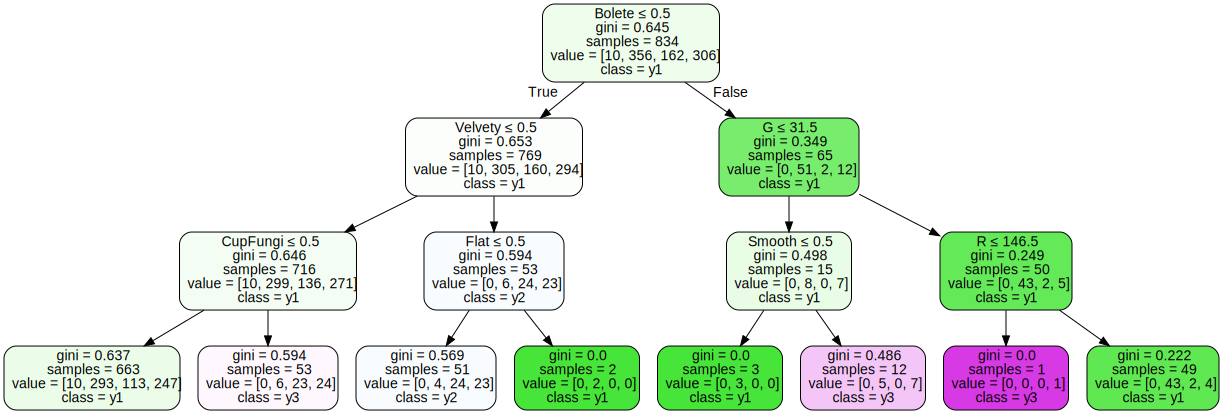

In [23]:
# Question 23

from sklearn.tree import export_graphviz
import graphviz

export_graphviz(tree_model, out_file="arbre/arbre_decision.dot",
                feature_names=X_train.columns,
                class_names=True,
                filled=True, rounded=True,
                special_characters=True)


# Lecture du fichier DOT et affichage de l'arbre
with open("arbre/arbre_decision.dot") as f:
    dot_graph = f.read()
graphviz.Source(dot_graph)

In [24]:
# Question 24
from joblib import dump

# Sauvegarder le modèle SVM
dump(svm_model, 'model/svm_model.joblib')
dump(svm_model_scaled, 'model/svm_model_scaled.joblib')

# Sauvegarder le modèle d'arbre de décision
dump(tree_model, 'model/tree_model.joblib')
dump(tree_model_scaled, 'model/tree_model_scaled.joblib')

['model/tree_model_scaled.joblib']

In [25]:
# Pour charger les modèles et les utiliser


from joblib import load

# Charger le modèle SVM
svm_model = load('model/svm_model.joblib')


# Charger le modèle d'arbre de décision
tree_model = load('model/tree_model.joblib')


# Faire des prédictions avec le modèle SVM
predictions_svm = svm_model.predict(X_test)


# Faire des prédictions avec le modèle d'arbre de décision
predictions_tree = tree_model.predict(X_test)

